In [1]:
# drive theke data nite drive r sathe connection
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy


In [3]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/train'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test'
# /content/drive/My Drive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered

#print(os.listdir(train_dir))
train_cats_dir = os.path.join(train_dir , 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#print(train_dir)
#print(train_cats_dir)
#print(train_dogs_dir)
#print(os.listdir(train_cats_dir))
print("training cats ", len(os.listdir(train_cats_dir)))
print("training dogs ", len(os.listdir(train_dogs_dir)))

total_training = len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)) 
print( 'total training ',total_training)


validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

print("validation cats ", len(os.listdir(validation_cats_dir)))
print("validation dogs ", len(os.listdir(validation_dogs_dir)))

total_validation = len(os.listdir(validation_cats_dir)) + len(os.listdir(validation_dogs_dir)) 
print("total validation ", total_validation)


training cats  1000
training dogs  1000
total training  2000
validation cats  500
validation dogs  500
total validation  1000


In [4]:
batch_size = 128
epochs = 25
img_height = 150
img_weight = 150

train_img_generator = ImageDataGenerator(rescale = 1/255)
valid_img_generator = ImageDataGenerator(rescale = 1/255)

#/content/drive/My Drive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/train
print(train_dir)
train_data_gen = train_img_generator.flow_from_directory(batch_size = batch_size, directory = train_dir, shuffle= True, target_size=(img_height,img_weight) , class_mode='binary' )
valid_data_gen = valid_img_generator.flow_from_directory(batch_size = batch_size, directory = validation_dir, shuffle= True,  target_size = (img_height, img_weight) , class_mode='binary' )


/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/train
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:

model = Sequential()
model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(img_height, img_weight ,3)) )
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu')) 
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu')) 
model.add(MaxPooling2D()),

# Flattening our dimensions
model.add(Flatten())
model.add(Dense(512, activation='relu'))
# Output layer
model.add(Dense(1))

In [6]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [7]:
train_data_gen.class_indices

{'cats': 0, 'dogs': 1}

In [8]:
history = model.fit(train_data_gen, steps_per_epoch=total_training / batch_size , epochs=epochs,validation_data=valid_data_gen, validation_steps = total_validation)


Epoch 1/25
15/15 [==============================] - 54s 3s/step - loss: 0.9681 - accuracy: 0.4789 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 2/25
15/15 [==============================] - 44s 3s/step - loss: 0.6874 - accuracy: 0.5016
Epoch 3/25
15/15 [==============================] - 43s 3s/step - loss: 0.6730 - accuracy: 0.5673
Epoch 4/25
15/15 [==============================] - 43s 3s/step - loss: 0.6128 - accuracy: 0.6265
Epoch 5/25
15/15 [==============================] - 43s 3s/step - loss: 0.5377 - accuracy: 0.7198
Epoch 6/25
15/15 [==============================] - 43s 3s/step - loss: 0.4735 - accuracy: 0.7619
Epoch 7/25
15/15 [==============================] - 44s 3s/step - loss: 0.4471 - accuracy: 0.7803
Epoch 8/25
15/15 [==============================] - 43s 3s/step - loss: 0.4459 - accuracy: 0.7934
Epoch 9/25
15/15 [==============================] - 43s 3s/step - loss: 0.3480 - accuracy: 0.8373
Epoch 10/25
15/15 [==============================] - 43s 3s/step - loss: 0.2

/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/cats/cat.2004.jpg
values  [[0]]
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/cats/cat.2001.jpg


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


values  [[0]]
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/cats/cat.2005.jpg
values  [[1]]


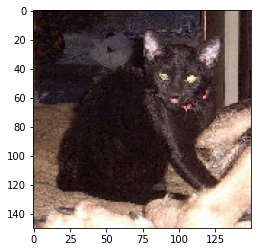

dogs
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/cats/cat.2000.jpg
values  [[0]]
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/cats/cat.2002.jpg
values  [[0]]
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/cats/cat.2006.jpg
values  [[1]]


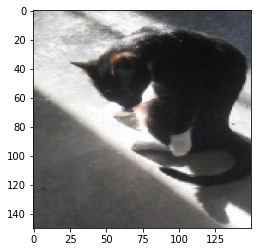

dogs
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/cats/cat.2008.jpg
values  [[0]]
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/cats/cat.2012.jpg
values  [[0]]
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/cats/cat.2010.jpg
values  [[0]]
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/cats/cat.2009.jpg
values  [[1]]


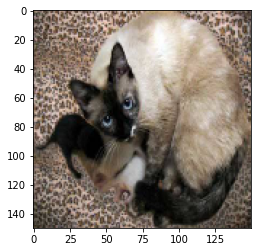

dogs


In [9]:

import cv2
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

m = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/cats'

l = os.listdir(m)
#print(l)
i = 0

for ii in l:
  image_dir = m+'/'+ str(ii)
  print(image_dir)
  #image = mpimg.imread(image_dir)
  image = load_img(image_dir, target_size=(150, 150 ))
  #print(image)
  

  e = img_to_array(image)
  e = numpy.expand_dims(e, axis = 0 )
  images1 = numpy.vstack([e])
  value = model.predict_classes(images1)
  print("values ", value)
  if value == 1:
    plt.imshow(image)
    plt.show()
    #print("correct")
  #else:
    print("dogs")
  i = i + 1
  if i == 10 :
    break
#plt.imshow(img)


/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/dogs/dog.2020.jpg
values  [[1]]
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/dogs/dog.2011.jpg
values  [[1]]
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/dogs/dog.2024.jpg
values  [[0]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


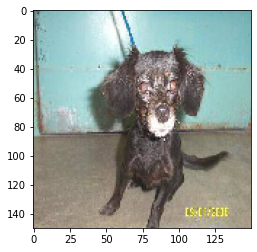

cats
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/dogs/dog.2005.jpg
values  [[1]]
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/dogs/dog.2008.jpg
values  [[0]]


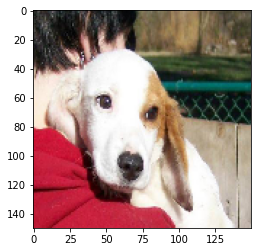

cats
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/dogs/dog.2013.jpg
values  [[1]]
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/dogs/dog.2014.jpg
values  [[1]]
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/dogs/dog.2010.jpg
values  [[1]]
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/dogs/dog.2001.jpg
values  [[1]]
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/dogs/dog.2007.jpg
values  [[1]]


In [10]:

import cv2
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

m = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/cats_and_dogs_filtered/test/dogs'

l = os.listdir(m)
#print(l)
i = 0

for ii in l:
  image_dir = m+'/'+ str(ii)
  print(image_dir)
  #image = mpimg.imread(image_dir)
  image = load_img(image_dir, target_size=(150, 150 ))
  #print(image)
  

  e = img_to_array(image)
  e = numpy.expand_dims(e, axis = 0 )
  images1 = numpy.vstack([e])
  value = model.predict_classes(images1)
  print("values ", value)
  if value == 0:
    plt.imshow(image)
    plt.show()
    #print("correct")
  #else:
    print("cats")
  i = i + 1
  if i == 10 :
    break
#plt.imshow(img)
